In [11]:
import pandas as pd, numpy as np
import urllib
import matplotlib.pyplot as plt

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test'
col_names = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf= pd.read_table(url,sep=',',names=col_names)

In [4]:
df = spectf.copy()
df.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [5]:
x = df.drop('target', axis=1)
y = df['target']
print(x.shape)
print(y.shape)

(187, 44)
(187,)


In [6]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x, y, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtr_sc = sc.fit_transform(xtr)

In [7]:
from sklearn.decomposition import PCA
pc = PCA(n_components = len(xtr.columns)-1)
pc.fit(xtr_sc)

PCA(copy=True, iterated_power='auto', n_components=43, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

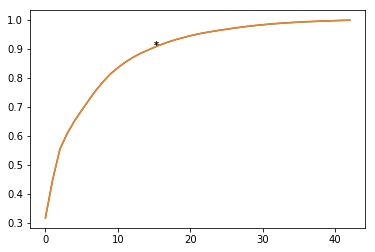

In [13]:
plt.plot(np.cumsum(pc.explained_variance_ratio_))
plt.annotate('*', xy= (15, .9))
plt.show()

In [14]:
pca = PCA(n_components = 15)
xtr_sc = pca.fit_transform(xtr)

Coorelation before PCA 


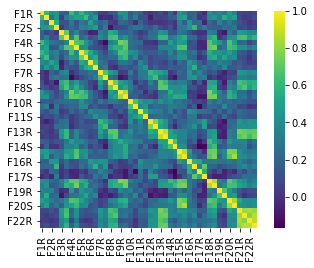

Coorelation After PCA


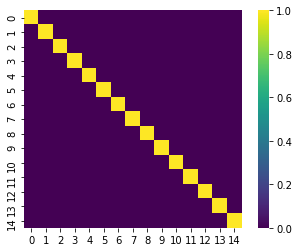

In [15]:
import seaborn as sns
print('Coorelation before PCA ' )
xtr_corr = xtr.corr()
sns.heatmap(xtr_corr, vmax=1, square= True, cmap = 'viridis')
plt.show()

print('Coorelation After PCA' )

xtr_sc_corr = pd.DataFrame(xtr_sc).corr()
sns.heatmap(xtr_sc_corr, vmax=1, square= True, cmap = 'viridis')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth =5, min_samples_split=2, n_estimators = 20, random_state=42)
rf.fit(xtr_sc , ytr)
rf.score(xtr_sc , ytr)

pca_xtest = pca.fit_transform(xts)

ypr = rf.predict(pca_xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypr, yts)
cm

array([[ 0,  0],
       [ 4, 43]], dtype=int64)